# Modeling Phase 3: Generalization

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Modeling-Phase-3:-Generalization" data-toc-modified-id="Modeling-Phase-3:-Generalization-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Modeling Phase 3: Generalization</a></span><ul class="toc-item"><li><span><a href="#Import-Libraries" data-toc-modified-id="Import-Libraries-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Import Libraries</a></span></li><li><span><a href="#Define-constants" data-toc-modified-id="Define-constants-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Define constants</a></span></li><li><span><a href="#Read-in-data" data-toc-modified-id="Read-in-data-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Read in data</a></span></li><li><span><a href="#Preprocessing" data-toc-modified-id="Preprocessing-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Preprocessing</a></span><ul class="toc-item"><li><span><a href="#Drop-all-census-related-features" data-toc-modified-id="Drop-all-census-related-features-1.4.1"><span class="toc-item-num">1.4.1&nbsp;&nbsp;</span>Drop all census related features</a></span></li><li><span><a href="#Pattern-submodel-to-handle-missing-values" data-toc-modified-id="Pattern-submodel-to-handle-missing-values-1.4.2"><span class="toc-item-num">1.4.2&nbsp;&nbsp;</span>Pattern submodel to handle missing values</a></span></li></ul></li><li><span><a href="#Model-preparation" data-toc-modified-id="Model-preparation-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Model preparation</a></span></li><li><span><a href="#Modeling" data-toc-modified-id="Modeling-1.6"><span class="toc-item-num">1.6&nbsp;&nbsp;</span>Modeling</a></span><ul class="toc-item"><li><span><a href="#Baseline-model" data-toc-modified-id="Baseline-model-1.6.1"><span class="toc-item-num">1.6.1&nbsp;&nbsp;</span>Baseline model</a></span></li><li><span><a href="#Linear-Regression" data-toc-modified-id="Linear-Regression-1.6.2"><span class="toc-item-num">1.6.2&nbsp;&nbsp;</span>Linear Regression</a></span><ul class="toc-item"><li><span><a href="#Ridge-Regularzation" data-toc-modified-id="Ridge-Regularzation-1.6.2.1"><span class="toc-item-num">1.6.2.1&nbsp;&nbsp;</span>Ridge Regularzation</a></span></li><li><span><a href="#Lasso-Regularzation" data-toc-modified-id="Lasso-Regularzation-1.6.2.2"><span class="toc-item-num">1.6.2.2&nbsp;&nbsp;</span>Lasso Regularzation</a></span></li><li><span><a href="#Linear-Regression-+-PCA" data-toc-modified-id="Linear-Regression-+-PCA-1.6.2.3"><span class="toc-item-num">1.6.2.3&nbsp;&nbsp;</span>Linear Regression + PCA</a></span></li></ul></li><li><span><a href="#Polynomial-Regression" data-toc-modified-id="Polynomial-Regression-1.6.3"><span class="toc-item-num">1.6.3&nbsp;&nbsp;</span>Polynomial Regression</a></span></li><li><span><a href="#KNN" data-toc-modified-id="KNN-1.6.4"><span class="toc-item-num">1.6.4&nbsp;&nbsp;</span>KNN</a></span></li><li><span><a href="#Tree-Based-Models" data-toc-modified-id="Tree-Based-Models-1.6.5"><span class="toc-item-num">1.6.5&nbsp;&nbsp;</span>Tree Based Models</a></span><ul class="toc-item"><li><span><a href="#Cart" data-toc-modified-id="Cart-1.6.5.1"><span class="toc-item-num">1.6.5.1&nbsp;&nbsp;</span>Cart</a></span></li><li><span><a href="#Bagged-Tree" data-toc-modified-id="Bagged-Tree-1.6.5.2"><span class="toc-item-num">1.6.5.2&nbsp;&nbsp;</span>Bagged Tree</a></span></li><li><span><a href="#Random-Forest" data-toc-modified-id="Random-Forest-1.6.5.3"><span class="toc-item-num">1.6.5.3&nbsp;&nbsp;</span>Random Forest</a></span></li><li><span><a href="#Extra-Trees" data-toc-modified-id="Extra-Trees-1.6.5.4"><span class="toc-item-num">1.6.5.4&nbsp;&nbsp;</span>Extra Trees</a></span></li><li><span><a href="#Ada-Boost" data-toc-modified-id="Ada-Boost-1.6.5.5"><span class="toc-item-num">1.6.5.5&nbsp;&nbsp;</span>Ada Boost</a></span></li></ul></li><li><span><a href="#SVR" data-toc-modified-id="SVR-1.6.6"><span class="toc-item-num">1.6.6&nbsp;&nbsp;</span>SVR</a></span></li><li><span><a href="#Stochastic-Gradient-Descent" data-toc-modified-id="Stochastic-Gradient-Descent-1.6.7"><span class="toc-item-num">1.6.7&nbsp;&nbsp;</span>Stochastic Gradient Descent</a></span></li></ul></li><li><span><a href="#Model-Selection" data-toc-modified-id="Model-Selection-1.7"><span class="toc-item-num">1.7&nbsp;&nbsp;</span>Model Selection</a></span></li><li><span><a href="#Model-Elevation" data-toc-modified-id="Model-Elevation-1.8"><span class="toc-item-num">1.8&nbsp;&nbsp;</span>Model Elevation</a></span><ul class="toc-item"><li><span><a href="#Plot-residuals" data-toc-modified-id="Plot-residuals-1.8.1"><span class="toc-item-num">1.8.1&nbsp;&nbsp;</span>Plot residuals</a></span></li></ul></li></ul></li></ul></div>

## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score

from sklearn.decomposition import PCA
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso, SGDRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor, RandomForestRegressor, ExtraTreesRegressor, AdaBoostRegressor
from sklearn.svm import SVR

# Libraries to visualize Tree Based models
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

/opt/anaconda3/lib/python3.7/site-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


## Define constants

In [2]:
RANDOM_STATE = 20200304

In [3]:
LOCATION = 'ny_state'

In [4]:
# TODO: EXPLAIN YOURSELF
TARGET = 'log_home_price_to_income_ratios'

In [5]:
CV = 4 

## Read in data

In [6]:
df = pd.read_csv(f'../data/final_{LOCATION}_agg.csv')

In [7]:
df.head()

,zipcode,total_accounting,total_airport,total_amusement_park,total_art_gallery,total_atm,total_bakery,total_bank,total_bar,total_beauty_salon,...,mean_price_level,mean_rating,mean_user_ratings_total,population,population_density_square_miles,housing_units,price_level*rating,user_ratings_total_per_capita,rating*population_density,log_home_price_to_income_ratios
0,14741,0,0,0,0,0,0,0,0,0,...,1.000000,4.400000,410.000000,1809,29.4,1260,4.400000,0.226645,129.36000,0.663932
1,13084,0,0,0,0,1,1,0,4,0,...,1.142857,3.232143,81.928571,3734,86.8,1601,3.693878,0.021941,280.55000,0.852157
2,13159,0,0,0,1,1,0,0,3,0,...,1.333333,4.112500,108.875000,5348,68.5,2303,5.483333,0.020358,281.70625,0.866606
3,14476,0,0,0,0,0,0,0,0,0,...,1.666667,4.428571,132.285714,2274,91.7,1049,7.380952,0.058173,406.10000,0.745526
4,12174,0,0,0,0,0,0,0,0,0,...,NaN,0.000000,0.000000,316,274.9,139,NaN,0.000000,0.00000,0.692566


In [8]:
df.shape

(1521, 105)

## Preprocessing

In [9]:
def high_corr_w_dependent_variable(df, dependent_variable, corr_value):
    '''
    Takes df, dependent variable, and value of correlation 
    Returns a df of independant varibles that are highly (e.g. abs(corr) > 0.4) with dependent varible
    '''
    temp_df = df.corr()[[dependent_variable]].sort_values(by=dependent_variable, ascending=False)
    mask_1 = abs(temp_df[dependent_variable]) > corr_value
    return temp_df.loc[mask_1]

In [10]:
high_corr_w_dependent_variable(df, 'log_home_price_to_income_ratios', 0.06)

,log_home_price_to_income_ratios
log_home_price_to_income_ratios,1.000000
total_open_now_True,0.613297
population_density_square_miles,0.588593
rating*population_density,0.585944
population,0.568489
housing_units,0.564353
total_meal_delivery,0.492924
total_store,0.490759
total_food,0.489080
total_cafe,0.487195


In [11]:
df = df[high_corr_w_dependent_variable(df, 'log_home_price_to_income_ratios', 0.06).index]

### Drop all census related features

In [12]:
census_cols = [
    'population_density_square_miles', 'rating*population_density',
    'population', 'housing_units', 'zipcode'
]

In [13]:
df.drop(columns=census_cols, inplace=True)

### Pattern submodel to handle missing values

In [14]:
# define a funciton to view the total and percentage of missing values 
def view_col_with_nans(df):
    mask_percent = df.isnull().mean().sort_values(ascending=False) 
    mask_total = df.isnull().sum().sort_values(ascending=False)
    total = mask_total[mask_total > 0]
    percent = mask_percent[mask_percent > 0] 
    missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    return missing_data

In [15]:
view_col_with_nans(df)

,Total,Percent
price_level*rating,157,0.103222
mean_price_level,157,0.103222


In [16]:
def pattern_split(df):
    pat_1_indexes = df[pd.isnull(df).any(axis=1)].index
    pat_0_indexes = set(df.index) - set(pat_1_indexes)

    # Dataset with ALL columns
    df_0 = df.loc[pat_0_indexes]
    
    # Dataset without columns containing NaNs
    df_1 = df.loc[pat_1_indexes].dropna(axis=1)
    return df_0, df_1

In [17]:
df_0, df_1 = pattern_split(df)

In [18]:
assert(df_0.isnull().sum().sum() == 0)
assert(df_1.isnull().sum().sum() == 0)

## Model preparation

Define a class that contains attributes for features and target selection, train_test_split, and fitting the model.
The class also contains methods for fitting a simple model or a grid-search model, as well as print the results etc.

In [19]:
class CatWalk:
    """
    If you know what I mean...
    If you don't know what I mean: https://www.youtube.com/watch?v=P5mtclwloEQ
    """
    
    def __init__(self, df):
        self.X = df.drop(columns=TARGET)
        self.y = df[TARGET] 
        self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(
            self.X, 
            self.y, 
            random_state=RANDOM_STATE, 
            train_size=0.60
        )
        # {'model_foo': (True, model_foo),
        #  'model_bar': (False, model_bar)}
        self._fitted_models = {} # type: Dict['name', (bool, Model)]
    
    def _save_model(self, name, model, is_grid_search=False):
        self._fitted_models[name] = (is_grid_search, model)
        
    def fit_model(self, name, fitter):
        model = fitter.fit(self.X_train, self.y_train)
        self._save_model(name, model)
        return self
        
    def fit_grid_search(self, name, pipe=None, params=None):
        pipe = Pipeline(steps=[]) if pipe is None else pipe
        params = {} if params is None else params
        
        model = GridSearchCV(
            pipe, 
            params, 
            cv=CV
        ).fit(self.X_train, self.y_train)
        
        self._save_model(name, model, is_grid_search=True)
        return self
    
    def print_results(self, name):
        grid_search, model = self._fitted_models[name]
        if not grid_search:
            print(f'train score: {model.score(self.X_train, self.y_train)}')
            print(f'test score: {model.score(self.X_test, self.y_test)}')
            print(f'cv score: {cross_val_score(model, self.X, self.y, scoring="r2", cv=CV).mean()}')
        else: 
            print(f'best params: {model.best_params_}')
            print(f'train score: {model.score(self.X_train, self.y_train)}')
            print(f'test score: {model.score(self.X_test, self.y_test)}')
            print(f'cv score: {cross_val_score(model.best_estimator_, self.X, self.y, scoring="r2", cv=CV).mean()}')      

    def do_the_simple_turn(self, name, fitter):
        self.fit_model(name, fitter)
        self.print_results(name)
        return self
                  
    def do_the_little_turn(self, name, pipe, params):
        self.fit_grid_search(name, pipe, params)
        self.print_results(name)
        return self
                  
    def model_name_list(self):
        return list(self._fitted_models.keys())
                  
    def get_model(self, name):
        return self._fitted_models[name][1]
                  
    def view_all_test_scores(self):
        for name, value in self._fitted_models.items():
            grid_search, model = value
            if grid_search:
                print(f'{name} test score: {model.score(self.X_test, self.y_test)}')
            else: 
                print(f'{name} test score: {model.score(self.X_test, self.y_test)}')
                  
    def make_predictions(self, name, input_data):
        preds = self.get_model(name).predict(input_data)
        return preds

## Modeling

In [20]:
# Instantiate a CatWalk object for dataset with full columns (dataset Pattern 0)
modeler_0 = CatWalk(df_0)
# Instantiate a CatWalk object for dataset without columns that have NaNs (dataset Pattern 1)
modeler_1 = CatWalk(df_1)

### Baseline model
Create a dummy regressor that will just predict means

In [21]:
# Model for Pattern 0
modeler_0.do_the_simple_turn('dummy', DummyRegressor(strategy='mean'));

train score: 0.0
test score: -0.005727490279588299
cv score: -0.0008187665057266535


In [22]:
# Model for Pattern 1
modeler_1.do_the_simple_turn('dummy', DummyRegressor(strategy='mean'));

train score: 0.0
test score: -0.012797259556982743
cv score: -0.00788243440970915


### Linear Regression

In [23]:
# Model for Pattern 0
modeler_0.do_the_simple_turn('lr', LinearRegression());

train score: 0.6161876940821087
test score: 0.5597954039086943
cv score: 0.567535943041715


For dataset pattern 0, the model performs okay comparing to the baseline model, but shows some signs of high variance. I will apply regularization in the following subsections to reduce the high variance.

In [24]:
# Model for Pattern 1
modeler_1.do_the_simple_turn('lr', LinearRegression());

train score: 0.21293670144999355
test score: -0.2841326682485159
cv score: -0.7912248980010141


For dataset pattern 1, The model performs badly comparing to the baseline model. We will default back to the dummy regressor for this pattern when making predictions.

#### Ridge Regularzation 

In [25]:
pipe = Pipeline(steps=[
    ('sc', StandardScaler()),
    ('ridge', Ridge())
])

params = {
   'ridge__alpha' : [0.01, 1, 10, 100, 200, 400],
}

In [26]:
# Model for Pattern 0
modeler_0.do_the_little_turn('gs_lr_l2', pipe, params);

best params: {'ridge__alpha': 10}
train score: 0.6158446529350405
test score: 0.5617454118427372
cv score: 0.5686924247713141


For dataset pattern 0, The model performs okay comparing to the baseline model, but still shows some signs of high variance. I will apply L1 regularization in the following subsections to reduce the high variance.

In [27]:
# Model for Pattern 1
modeler_1.do_the_little_turn('gs_lr_l2', pipe, params);

best params: {'ridge__alpha': 400}
train score: 0.07088580851844573
test score: -0.001409499080546217
cv score: -0.01259442837556346


For dataset pattern 1, The model performs badly, but slightly better comparing to the baseline model.

#### Lasso Regularzation

In [28]:
pipe = Pipeline(steps=[
    ('sc', StandardScaler()),
    ('lasso', Lasso())
])

params = {
   'lasso__alpha' : [0.01, 0.02, 1, 2, 3, 10],
}

In [29]:
# Model for Pattern 0
modeler_0.do_the_little_turn('gs_lr_l1', pipe, params);

best params: {'lasso__alpha': 0.01}
train score: 0.6005430760464792
test score: 0.5643622924617858
cv score: 0.5738931844785448


For dataset pattern 0, the model performs okay comparing to the baseline model, but still shows some signs of high variance. The test score has improved comparing to previous linear regression models. I will apply PCA for dimensionality reduction in the following subsections to reduce the high variance.

In [30]:
# Model for Pattern 1
modeler_1.do_the_little_turn('gs_lr_l1', pipe, params);

best params: {'lasso__alpha': 1}
train score: 0.0
test score: -0.012797259556982743
cv score: -0.00788243440970915


For dataset pattern 1, The model performs badly, but slightly better comparing to the baseline model.

#### Linear Regression + PCA

In [31]:
pipe = Pipeline(steps=[
    ('ss', StandardScaler()),
    ('pca', PCA()),
    ('lr_pca', LinearRegression())
])

params = {
    'pca__n_components': [10, 15, 20],
}

In [32]:
# Model for Pattern 0
modeler_0.do_the_little_turn('gs_lr_pca', pipe, params);

best params: {'pca__n_components': 20}
train score: 0.5503632625102282
test score: 0.5158617868212849
cv score: 0.5135761169282999


For dataset pattern 0, the model performs okay comparing to the baseline model, but still shows some signs of high variance. So far the L1 regularization is the most effective to reduce variance. Yet the result is not optimal. I will move onto other types of models.

In [33]:
# Model for Pattern 1
modeler_1.do_the_little_turn('gs_lr_pca', pipe, params);

best params: {'pca__n_components': 15}
train score: 0.11079367758937997
test score: 0.026819179497662993
cv score: -0.036459005475940165


For dataset pattern 1, The model performs badly comparing to the baseline model. We will default back to the dummy regressor for this pattern when making predictions.

### Polynomial Regression

In [34]:
pipe = Pipeline([
    ('sc', StandardScaler()),
    ('poly_features', PolynomialFeatures()),
    ('lr', LinearRegression())
])

params = {
    'poly_features__degree': [1, 2, 3],
}

In [35]:
# Model for Pattern 0
modeler_0.do_the_little_turn('gs_poly', pipe, params);

best params: {'poly_features__degree': 1}
train score: 0.6161876940821087
test score: 0.5597954039086941
cv score: 0.5675359430417148


During the EDA process, we know that many features do not have linear relation with the target. Fitting a Polynomial Regression model is my attempt to capture the non-linear relation. However, based on the grid-search, thee best model is a degree of 1, i.e. linear. We should try a different type of models that does not use linear regression as the estimator. 

In [36]:
# Model for Pattern 1
modeler_1.do_the_little_turn('gs_poly', pipe, params);

best params: {'poly_features__degree': 1}
train score: 0.21293670144999355
test score: -0.2841326682485168
cv score: -0.7912248980010158


For dataset pattern 1, The model performs badly comparing to the baseline model. We will default back to the dummy regressor for this pattern when making predictions.

### KNN

In [37]:
pipe = Pipeline(steps=[
        ('ss', StandardScaler()),
        ('knn', KNeighborsRegressor())
    ])

params = {
        'knn__n_neighbors': [5, 10, 50],
        'knn__p' : [1, 2],
        'knn__weights' : ['uniform', 'distance'],
         #'knn__leaf_size' : [30, 40]
    }


In [38]:
# Model for Pattern 0
modeler_0.do_the_little_turn('gs_knn', pipe, params);

best params: {'knn__n_neighbors': 10, 'knn__p': 1, 'knn__weights': 'distance'}
train score: 1.0
test score: 0.47944395781381927
cv score: 0.49525935760068407


For dataset pattern 0, The model performs okay comparing to the baseline model, but shows apparent signs of high variance and overfitting.

In [39]:
# Model for Pattern 1
modeler_1.do_the_little_turn('gs_knn', pipe, params);

best params: {'knn__n_neighbors': 50, 'knn__p': 1, 'knn__weights': 'uniform'}
train score: -0.0015783915670397608
test score: -0.03264714069874919
cv score: -0.018696896410356295


For dataset pattern 1, the model performs badly comparing to the baseline model. We will default back to the dummy regressor for this pattern when making predictions.

### Tree Based Models

#### Cart

In [40]:
pipe = Pipeline(steps=[
    ('ss', StandardScaler()),
    ('tree', DecisionTreeRegressor(random_state=RANDOM_STATE))
])

params = {
    'tree__max_depth' : [10, 15, 20, 30],
    'tree__min_samples_leaf' : [2, 3, 5],
    'tree__max_features' : [4, 6, 10]
}

In [41]:
# Model for Pattern 0
modeler_0.do_the_little_turn('gs_tree', pipe, params);

best params: {'tree__max_depth': 10, 'tree__max_features': 6, 'tree__min_samples_leaf': 5}
train score: 0.6868345416810724
test score: 0.3435352649741148
cv score: 0.3762953540593811


For dataset pattern 0, the tree model has high variance, since the train score is much higher than the test score, which is common in CART models. I will use a bootstrapped bagged tree to reduce the variance.

In [42]:
# Model for Pattern 1
modeler_1.do_the_little_turn('gs_tree', pipe, params);

best params: {'tree__max_depth': 10, 'tree__max_features': 4, 'tree__min_samples_leaf': 5}
train score: 0.0
test score: -0.012797259556982743
cv score: -0.16884699416165605


For dataset pattern 1, the model performs on a par with the baseline model.

#### Bagged Tree

In [43]:
pipe = Pipeline(steps=[
    ('ss', StandardScaler()),
    ('bag', BaggingRegressor(random_state=RANDOM_STATE))
])

params = {
    'bag__n_estimators' : [8, 10, 12, 14],
    'bag__max_samples' : [0.5, 0.7, 1],
    'bag__max_features' : [0.5, 0.7, 1]
}

In [44]:
# Model for Pattern 0
modeler_0.do_the_little_turn('gs_bag', pipe, params);

best params: {'bag__max_features': 0.7, 'bag__max_samples': 0.5, 'bag__n_estimators': 14}
train score: 0.8129693019064486
test score: 0.5572265415260889
cv score: 0.5432376951002269


For dataset pattern 0, the bagged tree model still has high variance, but the test score has improved comparing to the tree model. I will use Random Forest to reduce the variance and address the problem of overfitting. 

In [45]:
# Model for Pattern 1
modeler_1.do_the_little_turn('gs_bag', pipe, params);

best params: {'bag__max_features': 0.5, 'bag__max_samples': 1, 'bag__n_estimators': 12}
train score: -0.04383182758896664
test score: -0.005718384076373706
cv score: -0.07015306690290612


For dataset pattern 1, the bagged tree model is underfit, but better comparing to the baseline model. 

#### Random Forest

In [46]:
pipe = Pipeline(steps=[
    ('ss', StandardScaler()),
    ('forest', RandomForestRegressor(random_state=RANDOM_STATE))
])

params = {
    'forest__max_depth' : [10, 15, 20, 30],
    'forest__min_samples_leaf' : [2, 3, 5],
    'forest__max_features' : [4, 6, 10],
    'forest__min_impurity_decrease' : [0.0, 0.1]
}

In [47]:
# Model for Pattern 0
modeler_0.do_the_little_turn('gs_forest', pipe, params);

best params: {'forest__max_depth': 10, 'forest__max_features': 10, 'forest__min_impurity_decrease': 0.0, 'forest__min_samples_leaf': 5}
train score: 0.7360157845387758
test score: 0.5395979284201503
cv score: 0.5393641824650913


For dataset pattern 0, the Random Rorest model still has high variance, and the test score has not improved comparing to the bagged tree model. I will use Extra Trees to reduce the variance and address the problem of overfitting.

In [48]:
# Model for Pattern 1
modeler_1.do_the_little_turn('gs_forest', pipe, params);

best params: {'forest__max_depth': 10, 'forest__max_features': 4, 'forest__min_impurity_decrease': 0.1, 'forest__min_samples_leaf': 2}
train score: -0.0013825422892728145
test score: -0.006336757577861674
cv score: -0.01020890669068969


For dataset pattern 1, the Random Rorest model is underfit, but better comparing to the baseline model. 

#### Extra Trees 

In [49]:
pipe = Pipeline(steps=[
    ('ss', StandardScaler()),
    ('extra', ExtraTreesRegressor(random_state=RANDOM_STATE))
])

params = {
    'extra__max_depth' : [10, 15, 20, 30],
    'extra__min_samples_leaf' : [2, 3, 5],
    'extra__max_features' : [4, 6, 10],
    'extra__min_impurity_decrease' : [0.0, 0.1]
}

In [50]:
# Model for Pattern 0
modeler_0.do_the_little_turn('gs_extra', pipe, params);

best params: {'extra__max_depth': 10, 'extra__max_features': 10, 'extra__min_impurity_decrease': 0.0, 'extra__min_samples_leaf': 3}
train score: 0.7476936705196022
test score: 0.5061499115253838
cv score: 0.5388050057138605


For dataset pattern 0, the Extra Trees model still has high variance, and the test score has not improved comparing to the bagged tree model. Among the tree models, the bagged tree outperforms the others. Since all tree based models show some signs of underfitting, I will use Ada Boost to boost the growth of tree. 

In [51]:
# Model for Pattern 1
modeler_1.do_the_little_turn('gs_extra', pipe, params);

best params: {'extra__max_depth': 10, 'extra__max_features': 4, 'extra__min_impurity_decrease': 0.0, 'extra__min_samples_leaf': 3}
train score: 0.05942626512115634
test score: -0.037831275957217025
cv score: -0.028419212979625075


For dataset pattern 1, the Extra Trees model model performs badly comparing to the baseline model. We will default back to the dummy regressor for this pattern when making predictions.

#### Ada Boost

In [52]:
pipe = Pipeline(steps=[
    ('ss', StandardScaler()),
    ('ada', AdaBoostRegressor(random_state=RANDOM_STATE))
])

params = {
    'ada__learning_rate' : [0.5, 1.0, 1.2],
    'ada__loss' : ['linear', 'square', 'exponential']
}

In [53]:
# Model for Pattern 0
modeler_0.do_the_little_turn('gs_ada', pipe, params);

best params: {'ada__learning_rate': 0.5, 'ada__loss': 'linear'}
train score: 0.5854964809511775
test score: 0.4744635490347542
cv score: 0.46918054729485104


For dataset pattern 0, the Ada Boost does not improve the high variance or under-fitting problems.

In [54]:
# Model for Pattern 1
modeler_1.do_the_little_turn('gs_ada', pipe, params);

best params: {'ada__learning_rate': 0.5, 'ada__loss': 'linear'}
train score: 0.5728816185842793
test score: -0.10155559195544206
cv score: -0.17322898969758121


For dataset pattern 1, the Ada Boost model is underfit, and worse comparing to the baseline model.

### SVR

In [55]:
pipe = Pipeline(steps=[
    ('sc', StandardScaler()),
    ('svr', SVR())
])

params = {
    'svr__gamma' : ['scale'],
    'svr__degree' : [2, 3, 4],
    'svr__kernel' : ['linear', 'poly', 'rbf']
}

In [56]:
# Model for Pattern 0
modeler_0.do_the_little_turn('gs_svr', pipe, params);

best params: {'svr__degree': 2, 'svr__gamma': 'scale', 'svr__kernel': 'linear'}
train score: 0.6040805568542349
test score: 0.5471526339649586
cv score: 0.5638200090771687


For dataset pattern 0, The model performs okay comparing to the baseline model, but shows some signs of high variance.

In [57]:
# Model for Pattern 1
modeler_1.do_the_little_turn('gs_svr', pipe, params);

best params: {'svr__degree': 2, 'svr__gamma': 'scale', 'svr__kernel': 'rbf'}
train score: 0.25457648228382734
test score: -0.01493228424068338
cv score: -0.17294551878057096


For dataset pattern 1, the model performs badly comparing to the baseline model. We will default back to the dummy regressor for this pattern when making predictions.

### Stochastic Gradient Descent

In [58]:
pipe = Pipeline(steps=[
    ('sc', StandardScaler()),
    ('sgd', SGDRegressor())
])

params = {
    'sgd__max_iter': [800, 1000, 1200],
    'sgd__penalty' : ['l1', 'l2'],
    'sgd__tol': [1e-3]
}

In [59]:
# Model for Pattern 0
modeler_0.do_the_little_turn('gs_sgd', pipe, params);

best params: {'sgd__max_iter': 800, 'sgd__penalty': 'l2', 'sgd__tol': 0.001}
train score: 0.6130501799273469
test score: 0.5635511186419635
cv score: 0.5601961848639504


For dataset pattern 0, the model performs okay comparing to the baseline model, but shows some signs of high variance.

In [60]:
# Model for Pattern 1
modeler_1.do_the_little_turn('gs_sgd', pipe, params);

best params: {'sgd__max_iter': 1200, 'sgd__penalty': 'l2', 'sgd__tol': 0.001}
train score: 0.18120270702112162
test score: -0.08551494352088351
cv score: -0.35138273770202616


For dataset pattern 1, The model performs badly comparing to the baseline model. We will default back to the dummy regressor for this pattern when making predictions.

## Model Selection

In [61]:
# Compare test scores for Pattern 0
modeler_0.view_all_test_scores()

dummy test score: -0.005727490279588299
lr test score: 0.5597954039086943
gs_lr_l2 test score: 0.5617454118427372
gs_lr_l1 test score: 0.5643622924617858
gs_lr_pca test score: 0.5158617868212849
gs_poly test score: 0.5597954039086941
gs_knn test score: 0.47944395781381927
gs_tree test score: 0.3435352649741148
gs_bag test score: 0.5572265415260889
gs_forest test score: 0.5395979284201503
gs_extra test score: 0.5061499115253838
gs_ada test score: 0.4744635490347542
gs_svr test score: 0.5471526339649586
gs_sgd test score: 0.5635511186419635


In [62]:
# Compare test scores for Pattern 1
modeler_1.view_all_test_scores()

dummy test score: -0.012797259556982743
lr test score: -0.2841326682485159
gs_lr_l2 test score: -0.001409499080546217
gs_lr_l1 test score: -0.012797259556982743
gs_lr_pca test score: 0.026819179497662993
gs_poly test score: -0.2841326682485168
gs_knn test score: -0.03264714069874919
gs_tree test score: -0.012797259556982743
gs_bag test score: -0.005718384076373706
gs_forest test score: -0.006336757577861674
gs_extra test score: -0.037831275957217025
gs_ada test score: -0.10155559195544206
gs_svr test score: -0.01493228424068338
gs_sgd test score: -0.08551494352088351


In [63]:
percentage_df_0 = round(df_0.shape[0] / df.shape[0], 4)
percentage_df_0 

0.8968

- For dataset Pattern 0, which consists the 89.68% of the entire dataset, the **Linear Regression Model with L1 Regularization** outperforms the others. 
- For dataset Pattern 1, the Linear Regression Model with L1 Regularization performs on a par with the baseline model.   
- The Linear Regression Model with L1 Regularization has a test R2 score of 0.5643622924617858, which means that 56.44% percent of the variance is explained by the model. An ideal model would have a closer to 1 R2 score. This indicates that our model is somewhat inadequate in predicting the home affordability ratio. 

## Model Elevation

I will elevate the BaggingRegressor model using the following 4 visualization tool:
1.	Residual Plots
2.	Feature Importance
3.	Decision Tree Branching

### Plot residuals

In [73]:
y_preds_0 = np.exp(modeler_0.make_predictions('gs_lr_l1', modeler_0.X_test))
y_preds_1 = np.exp(modeler_1.make_predictions('gs_lr_l1', modeler_1.X_test))
y_preds = np.concatenate((y_preds_0, y_preds_1), axis=0)

In [74]:
y_test_0 = np.exp(modeler_0.y_test)
y_test_1 = np.exp(modeler_1.y_test)
y_test = np.concatenate((y_test_0, y_test_1), axis=0)

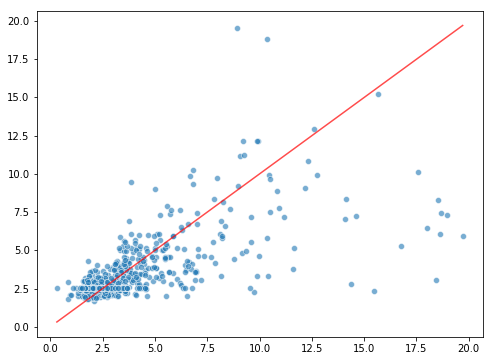

In [75]:
# 1st plot - y_true vs. y_pred
maxDist = max(max(y_preds),max(y_test)) 
minDist = min(min(y_preds),min(y_test))

plt.figure(figsize=(8, 6))
ax = sns.scatterplot(x=y_test, y=y_preds, alpha = .6)
ax.plot((minDist,maxDist),(minDist,maxDist), c = "r", alpha = .7);

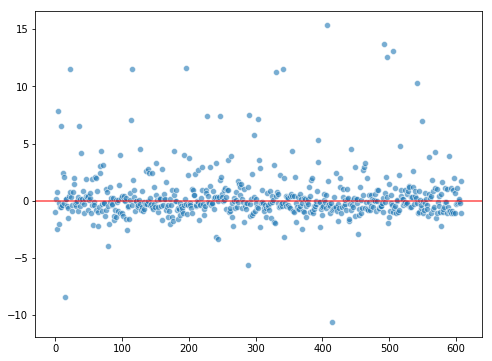

In [76]:
# 2nd plot: residual plot
resids = y_test - y_preds
plt.figure(figsize=(8, 6))
ax = sns.scatterplot(x=range(len(resids)), y=resids, alpha = .6)
ax.axhline(0, c = "r", alpha = .7);

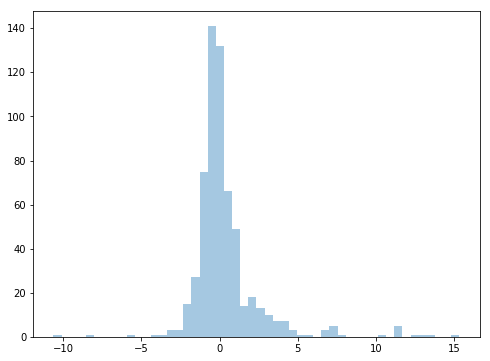

In [77]:
# 3rd plot: distribution of residuals
plt.figure(figsize=(8, 6))
sns.distplot(resids, kde = False);